In [5]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import geopandas as gpd
# import geopy.distance
import geoplot as gplt
import geoplot.crs as gcrs

import opendatasets as od
# import glob
import os
import zipfile


In [ ]:
# https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/countries

In [73]:
eu_url = "https://gisco-services.ec.europa.eu/distribution/v2/countries/download/ref-countries-2020-10m.geojson.zip"

od.download(eu_url)

10567680it [00:05, 1906213.21it/s]                                                                   


In [74]:
geo_dir = 'eu_geo_maps'

# os.mkdir(geo_dir)

with zipfile.ZipFile("ref-countries-2020-10m.geojson.zip", 'r') as zip_ref:
    zip_ref.extractall(geo_dir)

In [111]:
geo_regions_eu = gpd.read_file(geo_dir + '/' + 'CNTR_RG_10M_2020_4326.geojson')
# geo_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_01M_2020_4326.geojson')
geo_coastl_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_10M_2020_4326_COASTL.geojson')
geo_inland_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_10M_2020_4326_INLAND.geojson')

geo_boundaries_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_10M_2020_4326.geojson')

In [109]:
print(geo_regions_eu.shape)
print(geo_regions_eu.crs)
print(geo_regions_eu.columns)

(257, 14)
epsg:4326
Index(['id', 'CNTR_ID', 'CNTR_NAME', 'NAME_ENGL', 'NAME_FREN', 'ISO3_CODE',
       'SVRG_UN', 'CAPT', 'EU_STAT', 'EFTA_STAT', 'CC_STAT', 'NAME_GERM',
       'FID', 'geometry'],
      dtype='object')


In [48]:
geo_regions_eu.head()

,id,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
0,AQ,AQ,Antarctica,Antarctica,Antarctique,ATA,Sovereignty unsettled,None,F,F,F,Antarktis,AQ,"MULTIPOLYGON (((-57.47360 -63.56230, -57.63190..."
1,BV,BV,Bouvetøya,Bouvet Island,Île Bouvet,BVT,NO Territory,None,F,F,F,Bouvetinsel,BV,"POLYGON ((3.08710 -54.40140, 3.40700 -54.34860..."
2,BW,BW,Botswana-Botswana,Botswana,Botswana,BWA,UN Member State,Gaborone,F,F,F,Botsuana,BW,"POLYGON ((25.27030 -17.79890, 26.18730 -19.502..."
3,BY,BY,Беларусь,Belarus,Biélorussie,BLR,UN Member State,Minsk,F,F,F,Belarus,BY,"POLYGON ((31.78690 52.11150, 30.91120 52.02520..."
4,BZ,BZ,Belize,Belize,Belize,BLZ,UN Member State,Belmopan,F,F,F,Belize,BZ,"MULTIPOLYGON (((-87.68040 17.35980, -87.85440 ..."


In [113]:
geo_inland_eu.head()

,EU_FLAG,EFTA_FLAG,CC_FLAG,OTHR_FLAG,COAS_FLAG,CNTR_BN_ID,POL_STAT,CNTR_BN_CODE,CNTR_CODE,FID,geometry
0,F,F,F,T,F,434,0,434.0,LS,434,"LINESTRING (27.02988 -29.64694, 27.03492 -29.6..."
1,F,F,F,T,F,441,0,441.0,MZ,441,"LINESTRING (32.89152 -26.85833, 32.37762 -26.8..."
2,F,F,F,T,F,445,0,445.0,MZ,445,"LINESTRING (32.13366 -26.83498, 32.13520 -26.5..."
3,F,F,F,T,F,447,0,447.0,SZ,447,"LINESTRING (32.13366 -26.83498, 32.07777 -26.8..."
4,F,F,F,T,F,448,0,448.0,AR,448,"LINESTRING (-54.59410 -25.59227, -54.43959 -25..."


In [81]:
cities = pd.read_csv("worldcities.csv")
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [88]:
cities_coord = cities[['city', 'lat', 'lng', 'iso2', 'population']].sort_values('population', ascending=False)

cities_coord_gdf = gpd.GeoDataFrame(
    cities_coord, geometry=gpd.points_from_xy(cities_coord.lng, cities_coord.lat), crs="EPSG:4326"
)
cities_coord_gdf.head()

,city,lat,lng,iso2,population,geometry
0,Tokyo,35.6897,139.6922,JP,37732000.0,POINT (139.69220 35.68970)
1,Jakarta,-6.1750,106.8275,ID,33756000.0,POINT (106.82750 -6.17500)
2,Delhi,28.6100,77.2300,IN,32226000.0,POINT (77.23000 28.61000)
3,Guangzhou,23.1300,113.2600,CN,26940000.0,POINT (113.26000 23.13000)
4,Mumbai,19.0761,72.8775,IN,24973000.0,POINT (72.87750 19.07610)


In [110]:
# germany_cities_gpd = cities_coord_gdf[
#     (cities_coord_gdf['iso2'] == 'DE') & 
#     (cities_coord_gdf['population'] >= 600000 )
# ]
# germany_cities_gpd.head(40)

<GeoAxesSubplot: >

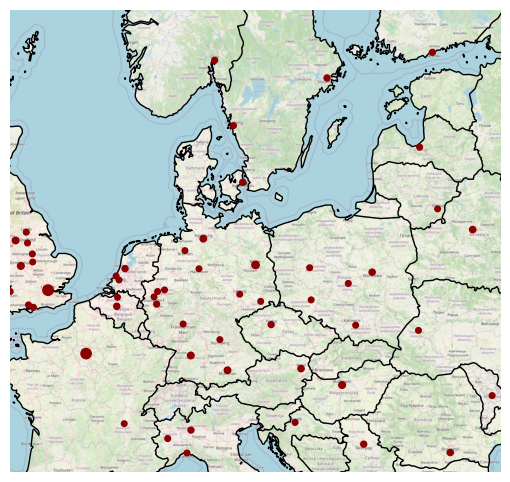

In [127]:
# https://residentmario.github.io/geoplot/api_reference.html

center_coord = (52.5170365, 13.3888599)
delta_lat, delta_lng = 9, 16
extent_coord = (center_coord[1]-delta_lng, center_coord[0]-delta_lat, center_coord[1]+delta_lng, center_coord[0]+delta_lat)

ax = gplt.webmap(germany_gpd, extent=extent_coord, projection=gcrs.WebMercator()) # 
gplt.pointplot(cities_coord_gdf[cities_coord_gdf['population'] >= 500000], ax=ax, color='darkred', extent=extent_coord, scale='population', limits=(4,16)) # germany_cities_gpd
gplt.polyplot(geo_boundaries_eu, ax=ax, extent=extent_coord)
# gplt.choropleth(geo_coastl_eu, ax=ax, color='blue', extent=extent_coord)
# gplt.choropleth(geo_inland_eu, ax=ax, color='black', extent=extent_coord)



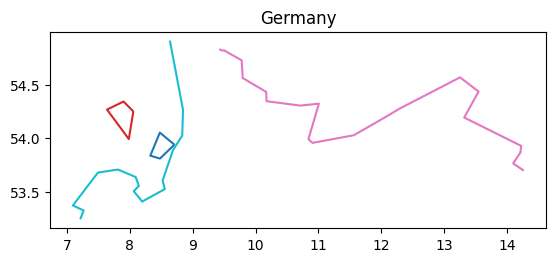

In [44]:
germany_coastl_gpd = geo_coastl_eu[geo_coastl_eu['CNTR_CODE'] == 'DE']

germany_coastl_gpd.plot(column='geometry') # , cmap='Set3', legend=True
plt.title('Germany')
plt.show()


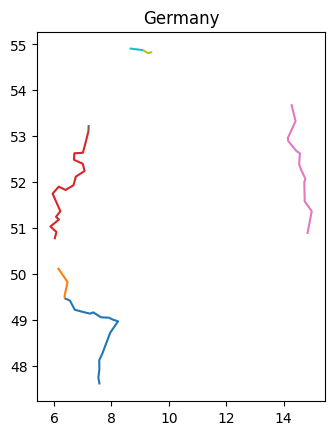

In [42]:
germany_inland_gpd = geo_inland_eu[geo_inland_eu['CNTR_CODE'] == 'DE']

germany_inland_gpd.plot(column='geometry') # , cmap='Set3', legend=True
plt.title('Germany')
plt.show()


In [55]:
geo_labels_eu.head()

,id,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
0,AD,AD,Andorra,Andorra,Andorre,AND,UN Member State,Andorra la Vella,F,F,F,Andorra,AD,POINT (1.59140 42.54220)
1,AE,AE,الإمارات العربية المتحدة,United Arab Emirates,Émirats arabes unis,ARE,UN Member State,Abu Dhabi,F,F,F,Vereinigten Arabischen Emirate,AE,POINT (53.98240 23.46560)
2,AF,AF,افغانستان-افغانستان,Afghanistan,Afghanistan,AFG,UN Member State,Kabul,F,F,F,Afghanistan,AF,POINT (65.99790 33.81790)
3,AG,AG,Antigua and Barbuda,Antigua and Barbuda,Antigua-et-Barbuda,ATG,UN Member State,St John's,F,F,F,Antigua und Barbuda,AG,POINT (-61.80970 17.07850)
4,AI,AI,Anguilla,Anguilla,Anguilla,AIA,UK Non-Self-Governing Territory,The Valley,F,F,F,Anguilla,AI,POINT (-63.03760 18.22410)


In [8]:
import requests


In [10]:
# Countries 2020 files are listed in:

geo_api_url = "https://gisco-services.ec.europa.eu/distribution/v2/countries/countries-2020-files.json"
geo_response = requests.get(geo_api_url)
geo_response.status_code

200

In [11]:
geo_request = geo_response.request
geo_request.headers

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [12]:
geo_response.json()

{'csv': {'CNTR_AT_2020.csv': 'csv/CNTR_AT_2020.csv',
  'CNTR_RG_BN_01M_2020.csv': 'csv/CNTR_RG_BN_01M_2020.csv',
  'CNTR_RG_BN_03M_2020.csv': 'csv/CNTR_RG_BN_03M_2020.csv',
  'CNTR_RG_BN_10M_2020.csv': 'csv/CNTR_RG_BN_10M_2020.csv',
  'CNTR_RG_BN_20M_2020.csv': 'csv/CNTR_RG_BN_20M_2020.csv',
  'CNTR_RG_BN_60M_2020.csv': 'csv/CNTR_RG_BN_60M_2020.csv'},
 'geojson': {'CNTR_BN_01M_2020_3035.geojson': 'geojson/CNTR_BN_01M_2020_3035.geojson',
  'CNTR_BN_01M_2020_3035_COASTL.geojson': 'geojson/CNTR_BN_01M_2020_3035_COASTL.geojson',
  'CNTR_BN_01M_2020_3035_INLAND.geojson': 'geojson/CNTR_BN_01M_2020_3035_INLAND.geojson',
  'CNTR_BN_01M_2020_3857.geojson': 'geojson/CNTR_BN_01M_2020_3857.geojson',
  'CNTR_BN_01M_2020_3857_COASTL.geojson': 'geojson/CNTR_BN_01M_2020_3857_COASTL.geojson',
  'CNTR_BN_01M_2020_3857_INLAND.geojson': 'geojson/CNTR_BN_01M_2020_3857_INLAND.geojson',
  'CNTR_BN_01M_2020_4326.geojson': 'geojson/CNTR_BN_01M_2020_4326.geojson',
  'CNTR_BN_01M_2020_4326_COASTL.geojson': 'geoj

In [ ]:
# Examples: NUTS_RG_01M_2016_3035_LEVL_0.geojson, CNTR_BN_01M_2016_3035_INLAND.geojson

# theme: 4-character code of theme (NUTS)

# spatialtype: BN/RG/LB
# BN: boundaries (multilines)
# RG: regions (multipolygons)
# LB: labels (points)
# resolution: 60M/20M/10M/03M/01M; map scale the data is optimized (generalized) for.

# year: the year of NUTS regulation (2016/2013/2010/2006/2003).
# projection: 4-digit EPSG code
# EPSG:4326 (WGS84, coordinates in decimal degrees)
# EPSG:3035 (ETRS 1989 in Lambert Azimutal projection with centre in E52N10, coordinates in meters)
# EPSG:3857 (WGS84 Web Mercator Auxiliary Sphere, coordinates in meters)
# subset: depends on the dataset. Common cases:
# NUTS levels 0,1,2,3. No subset code means all NUTS levels are in the same file.
# LEVL_0: NUTS level 0 (countries)
# LEVL_1: NUTS level 1
# LEVL_2: NUTS level 2
# LEVL_3: NUTS level 3
# Country boundaries: coastline or inland line. No subset code means all country boundaries are in the same file.
# INLAND: inland boundaries
# COASTL: coastlines

In [ ]:
# 4326
